# SMV2rho: Tutorial 1

This notebook will show you how to load a velocity profile into `SMV2rho`.

The installation of SMV2rho should have checked that all dependencies are installed.  If errors arise relating to missing modules such as `numpy`, then please refere to `README.md` for further information.

## Importing the relevant modules

For this tutorial we need to import the `plotting` and `density_functions` modules from the `SMV2rho` package.

In [1]:
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## File layout

First let's take a look at the necessary file structure required by this family of programs.

The required file format is strict because the scripts will read the file in a particular order.  If the file is not presented in this format then errors will occur that could lead to erroneous results.  Please note that this requirement means that continuous 3-D velocity models must first be converted into 1-D profiles before using the software.  Run the following cell to see the required file layout.  Note only ascii text files with the `.dat` suffix are acceptable.

Depth must be in the **second column** and **negative**.  At this stage it does not matter, but when coverting profiles later on, depth must be in **km/s** and depth in **negative km**.

First we will use a local file stored in the `TEST_DATA` directory with this distribution.

In [2]:
# plot an example data file
print("\nExample file:\n \
       ID \n \
       lon lat \n \
       crustal_thickness \n \
       V  -depth \n \
       .   . \n \
       .   . \n \
       .   . \n")



Example file:
        ID 
        lon lat 
        crustal_thickness 
        V  -depth 
        .   . 
        .   . 
        .   . 



In [3]:
# path to test velocity file
#  - this file comes with the distribution so there is no need to change this path
vp_file = "../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat"

# print the file format
print("Real file...\n")
smplt.print_text_file(vp_file)

Real file...

M19_AQU_Vp
13.48	42.34
37.2
4.84865  0
4.84865  -2.5
7.23144  -2.5
7.23144  -16.2
6.42768  -16.2
6.42768  -37.2
6.55704  -37.2
6.55704  -65.9



## Data Structure

The file structure is strict.  Velocity profiles **must** be placed in a file structure following the structure shown below.  A typical velocity profile file will look like this: `Vp/METHOD/DATA/my_profile_name.dat`.  We can draw a file tree showing this structure.  Note that this structure **must** be followed even for individual profiles because the program gathers various metadata about the profile from the file string.

In [4]:
# draw a file tree
smplt.draw_file_tree('../TEST_DATA', include_files=False, 
               suppress_pycache=True, suppress_hidden=True)

TEST_DATA
|- TEST_DATA
|  |- EUROPE
|  |  `- Vp
|  |     `- RECEIVER_FUNCTION
|  |        `- DATA
|  `- HUDSON_BAY
|     `- Vs
|        `- RECEIVER_FUNCTION
|           `- DATA


## Loading files

We will now load this velocity profile into the program using the Conver class.
Note if the `profile_type` variable is not set, you will receive a `ValueError` asking for `profile_type` to be set.  This error is raised so that the program knows how to needs to handle dofferent file types.

In [5]:
# load a profile into the Convert class
profile = smd.Convert(vp_file, profile_type = "Vp")

Documentation for all objects (e.g. modules, classes, functions) is availiable by typing the object of interest followed by a queastion mark.  Let's take a look at the docstring for the `Convert` calss...

In [6]:
# manual for Convert class
smd.Convert?

Init signature: smd.Convert(profile, profile_type=None, region_name=None)
Docstring:     
Convert seismic velocity profiles to various parameters using different 
approaches.

This class provides methods to read seismic velocity profiles, convert 
them to other parameters, and write the converted data to output files.

Args:
    profile (str): The file path to the seismic profile data.
    profile_type (str): The type of the seismic profile, either "Vp" or 
        "Vs."
    region_name (str, optional): The geographic location of the profile, 
        e.g., "MADAGASCAR." (default is None)

Attributes:
    data (dict): A dictionary containing parsed seismic profile data.
    moho (float): The Moho depth parsed from the profile data.

Methods:
    read_data: Read in data file and parse it into a data dictionary.
    convert_profile_brocher: Convert Vs profile to Vp profile using 
        Brocher's (2005) approach.
    Vp_to_density_brocher: Convert Vp profile to density using Brocher 
  

## Reading the file

We will now read the profile and generate a `"Vp"` attribute to the `profile` class instance.  The `read_data` method will unpack the information contained in the file and calculate the average velocity for the profile.

The data,`profile.data`, will be stored as a disctionary.

In [7]:
# read in the file
profile.read_data()

# print the data dictionary
profile.data

{'station': 'M19_AQU_Vp',
 'Vp_file': '../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat',
 'region': None,
 'moho': 37.2,
 'location': array([13.48, 42.34]),
 'av_Vp': 6.617358544354839,
 'Vp': array([[  0.     ,   4.84865],
        [ -2.5    ,   4.84865],
        [ -2.51   ,   7.23144],
        [-16.2    ,   7.23144],
        [-16.21   ,   6.42768],
        [-37.2    ,   6.42768]]),
 'type': 'Vp',
 'method': 'RECEIVER_FUNCTION'}

We can inspect the different data types that are stored using...

In [8]:
# show velocity profile dictionary keys
profile.data.keys()

dict_keys(['station', 'Vp_file', 'region', 'moho', 'location', 'av_Vp', 'Vp', 'type', 'method'])

We can access different variables, such as the average, bulk velocity by querying this dictionary.

Note that the software has automatically detected that this profile is a Vp profile and the the method is `RECEIVER_FUNCTION`.  It gathers this information by reading the file string.  Note that this means that the Vp profiles **must** be placed in a `Vp` directory.

In [15]:
# print average velocity and moho depth
print(profile.data['type'])
print(profile.data['method'])
print(profile.data['av_Vp'])
print(profile.data['moho'])

Vp
RECEIVER_FUNCTION
6.617358544354839
37.2


## Summary

We have now imported modules, loaded a velocity profile and interrogated some of their attributes.  Let's plot the velocity profile to check what it looks like.

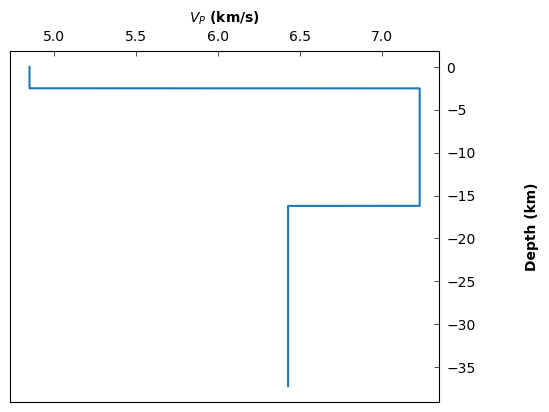

In [13]:
# plot velocity profile
data1 = [{'x': profile.data["Vp"][:,1], 'y': profile.data["Vp"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1], plot_type='line', 
            cmap=None, titles=None, 
            xlabels=[r'${V_P}$ (km/s)'], ylabels=['Depth (km)'],
            z_values=None, figure_scale=0.7, 
            save_path=None)